# GETTING AND LOADING A CORPUS

https://nlpforhackers.io/corpora/
http://lucumr.pocoo.org/2015/11/18/pythons-hidden-re-gems/

The goal of this step is to develop an initial list of each character and their spoken lines, or a cleanish list of the lines within the text. (Dictionaries are Hash value arbitrary, so may not be ordered the same. Lists are used instead.)

In [1]:
# Select and Read a file into "f" using a list and stripping out all Project Gutenberg headers and footers

from pathlib import Path
import re
data_folder = Path("data/murray_kempton/")
file_to_open = data_folder / "On_Frank_Sinatra.txt"
f = open(file_to_open, 'r')
first_document = list(f)
#print(first_document)

# Determine whether a Project Gutenberg Text
first_header_index = 0
second_header_index = 0
footer_index = 0
if any("GUTENBERG" in s for s in first_document):
    for first_header_index in range( len(first_document) ):
        if ( ( first_document[first_header_index].find('*END*THE SMALL PRINT!') ) != -1 ) :
            break
        else:
            for first_header_index in range( len(first_document) ):
                if ( ( first_document[first_header_index].find('START OF THIS PROJECT GUTENBERG') ) != -1 ) :
                    break        
        
    second_document = list(first_document[first_header_index + 1 :])

    for second_header_index in range( len(second_document) ):
        if ( ( second_document[second_header_index].find('www.gutenberg.org') ) != -1 ) :
            break            
    for footer_index in range( len(first_document) ):
        if ( ( first_document[footer_index].find('End of Project') ) != -1 ) :
            break
        else:
            for footer_index in range( len(first_document) ):
                if ( ( first_document[footer_index].find('End of the Project') ) != -1 ) :
                    break    
        
    print(first_header_index)            
    print(second_header_index)
    print(footer_index)     
    
    script = list()
    if (second_header_index < (first_header_index + 100)):
        script = list(first_document[first_header_index +1 + second_header_index +1 : footer_index-1])
    else:
        script = list(first_document[first_header_index +1 : footer_index-1])
else:
    script = first_document

#print(script)

In [2]:
#Compile a list of speakers
r = re.compile("[A-Z0-9][A-Z0-9]+")
speakers = []
for line in script:
    mtch = r.match(line)
    if mtch:
        speakers.append(mtch.group())
#print(speakers)

#Omit speakers from the list of text
s = re.compile(r"\b[A-Z{3}\.]+\b")
spoken = list(filter(lambda i: not r.search(i), script))

#print(spoken)

# RE-CREATING SENTENCES AND PHRASES

During this step, we concatenate lines in batches to allow the identification of sentences with regular expressions. Then we identify phrases with stop words.

In [3]:
#Concatenate lines into list entries for future sentence splitting

newLines = []
singleLine = ''
singleLines = []

#Remove all line returns
for j in range(0, len(spoken)):
    spoken[j] = spoken[j].replace('\n', '')
    
#Split 5 lines at a time into new list
for k in range( 0, len(spoken), 3):
    newLines = []
    for line in range( 0, 3 ):
        try:
            newLines.append(' '+spoken[line+k])
        except:
            #print("Index Error at", k, line)
            break
    #Join 5-line groups into one line and append to a list
    singleLine = ''.join(newLines)
    singleLines.append(singleLine)

#print(singleLines)

In [4]:
#Create list of sentences
sentences = []
for m in range(0, len(singleLines)):
    mtch = re.findall("[A-Z][^\.!?]*[\.!?]", singleLines[m], re.M|re.I)
    if mtch:
        sentences.append(mtch)

#print(sentences)

In [5]:
#Clean the stopword list
stoplist = []
clean_line = []
data_folder = Path("data/")
file_to_open = data_folder / "snowball_stop.txt"
f = open(file_to_open, 'r')
full_stop = list(f)

for n in range( 0, len(full_stop), 1 ):
    clean_line = full_stop[n].split('|')
    stoplist.append(clean_line[0])

for p in range(len(stoplist)):
    stoplist[p] = stoplist[p].replace('\n', '')
    
#print(stoplist)

In [6]:
# Create list of phrases using stopwords
phrases = []
candidate_phrases = []

for q in range(len(sentences)):
    for r in sentences[q]:
        words = re.split("\\s+", r)
        previous_stop = False
 
        # Examine each word to determine if it is a phrase boundary marker or part of a phrase or alone
        for w in words:
 
            if w in stoplist and not previous_stop:
                # phrase boundary encountered, so put a hard indicator
                candidate_phrases.append(";")
                previous_stop = True
            elif w not in stoplist and len(w) > 3:
                # keep adding words to list until a phrase boundary is detected
                candidate_phrases.append(w.strip())
                previous_stop = False
 
    # Create a list of candidate phrases without boundary demarcation
    phrases = re.split(";+", ' '.join(candidate_phrases))

# Clean up phrases    
re2 = re.compile('[^\.!?,"(){}\*:]*[\.!?,"(){}\*:]')
for s in range(len(phrases)):
    phrases[s] = re.sub(re2, '', phrases[s])
    phrases[s] = phrases[s].strip(' ')
    phrases[s] = phrases[s].replace(' ', '_')
    phrases[s] = phrases[s].replace('__', '_')
    phrases[s] = phrases[s].strip('_')

for s in range(len(phrases)):
    try:
        phrases.remove('')
        phrases.remove(' ')
        phrases.remove('/n')
    except:
        pass
    
for t in range(50):
    print(phrases[t])

#print(phrases)

Frank_Sinatra_ever
fullest_duty
leaving
duty
dealing
subject
Sinatra_came
intruder-mistrusting_voice_suddenly_softened
Just
little_telling
That’s
have
thing
trash
also_knew
everything
stolen
have
taste
confine_your_larcenies
appreciate
work
overlook_elements
porkpie
walk
shadows
loneliness
light
back
taken_intact
“One
Baby”
Fred_Astaire_consummated
unjustly_forgotten_movie_Sky’s
remember
Sinatra_trying
together
sextet
Kennedy_Inaugural
finally
you’ll_ever_learn
sing
listen
Billie_Holiday
find
play
Lord_given_voice
mother
magpie’s_cunning_account
enduring_distinction


# TERM FREQUENCY–INVERSE DOCUMENT FREQUENCY (TF-IDF)
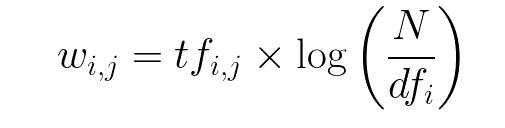
The quintessential early Natural Language Processing tool, the TF-IDF analysis for context and sentiment evaluation is useful only over a large corpus. It must be understood that the corpus is not just a sample to be evaluated, but instead is the entire population that sets a 'benchmark' for evaluation, if you will. 

Here we establish a Term Frequency (TF) count of word frequencies, just as we showed a phrase frequency count in the last step in this notebook.

In [7]:
#Establish wordList
wordList = []
for u in range(len(sentences)):
    for v in sentences[u]:
        words = re.split("\\s+", v)
        wordList.extend(words)
        
for w in range(50):
    print(wordList[w])

Frank
Sinatra
ever
did
the
fullest
duty
to
his
art,
and
now
he
is
leaving
us
with
the
duty
to
sum
him
up.
My
betters
have
already
done
that.
One
day
I
was
dealing
with
Ella
Fitzgerald,
and
the
subject
of
Sinatra
came
up
and
her
intruder-mistrusting
voice
suddenly
softened


In [8]:
#Establish wordDict
wordDict = {}
for w in range(len(wordList)):
    newWord = wordList[w]
    newWord = newWord.lower()
    newWord = newWord.replace('.', '')
    wordDict[w] = newWord
#print(wordDict)
    
#Perform word counts on dict
countDict = {}
for x in range(len(wordDict)):
    term = wordDict[x]
    count = 1
    for y in range(len(wordDict)):
        try:
            if wordDict[y].find(term) > 0:
                count += 1
        except:
            pass
        countDict[term] = count

for k, v in countDict.items():
    print(k, v)

frank 2
sinatra 1
ever 3
did 1
the 7
fullest 1
duty 1
to 16
his 4
art, 1
and 4
now 2
he 65
is 29
leaving 1
us 9
with 1
sum 2
him 1
up 2
my 3
betters 1
have 1
already 1
done 1
that 4
one 6
day 3
i 181
was 1
dealing 1
ella 1
fitzgerald, 1
subject 1
of 2
came 2
her 11
intruder-mistrusting 1
voice 1
suddenly 1
softened 1
she 1
said, 1
“frank 1
just 2
this 1
little 1
guy 1
telling 1
story 1
that’s 1
all 7
you 1
be 4
for 3
knew, 1
as 21
every 1
artist 1
must, 1
there 1
no 4
such 1
thing 2
trash 1
cannot 1
transcended 1
also 1
knew 1
second 1
great 1
lesson, 1
which 1
everything 1
stolen 1
if 4
taste 1
confine 1
your 1
larcenies 1
worth-taking 1
we 3
appreciate 1
work 1
overlook 1
its 1
elements 1
creative 1
plagiarism 1
porkpie 1
hat 19
walk 1
into 1
shadows 1
loneliness 1
light 2
at 51
back 1
are 5
taken 1
intact 1
from 1
“one 1
baby” 1
fred 1
astaire 1
consummated 1
in 55
unjustly 1
forgotten 1
movie 1
sky’s 1
limit 1
remember 1
when 1
trying 1
put 1
together 1
a 186
sextet 1
kennedy 1
ina

In [9]:
# Computes ratio of word's appearances to total words
bow = wordList
bowCount = len(bow) #BOW = Bag of Words
tfDict = {}
for term, count in countDict.items():
    tfDict[term] = count/float(bowCount)

num = dict(sorted(tfDict.items(), key=lambda x: x[1], reverse = True))
#for (k, v in num.items()):
    #print(k, v)

# PERFORM A PHRASE FREQUENCY COUNT

Now we can identify common phrases by performing a frequency count on each phrase.  Moreover, if the corpus is large enough, commonly used phrases will be evident with higher counts across many texts.  For this reason the phrase list along with counts, will be stored in a file.

In [10]:
# Phrase frequency count
from operator import itemgetter
wordfreq = []
for u in range(len(phrases)):
    utterance = phrases[u]
    uttcnt = 0
    uttcnt = phrases.count(utterance)
    if uttcnt > 1:
        wordfreq.append(uttcnt)
    
zipped = list(zip(phrases, wordfreq))
sortzip = sorted(zipped, key=itemgetter(1), reverse=True)
phraseFreqDict = dict(sortzip)


In [11]:
"""
If a sentence is usually 'subject' then 'verb' and then 'noun', we could assume that a good sentence or 
phrase (which could or also could not be a sentence), would have that structure. Simply, the common research topics 
of 'attention' 'sentiment' and 'semantics' match these structural terms in functionality, at least somewhat. 
We use a trifecta of unit vectors initially therefore to represent each of these terms, and apply them in a relatively 
intuitive fashion. Semantics are often considered ordinal and therefore a vector in 3-space could be (1,1,0). Taking a 
cartesian approach to the 3-space, Sentiment could be described as (1,0,1) when flat and Attention has been described 
as nearly orthogonal to sentiment and could therefore be (0,1,1).
"""

import xxhash, numpy
from keras.preprocessing.text import one_hot

phraseDictH = {}
# Estimate the size of the vocabulary
vocabSize = len(phrases)
docSize = len(spoken)
phraseFreqs = phraseFreqDict.values()
phraseVocab = phraseFreqDict.keys() 

# Return a dictionary whose keys are phrase tokens, the values are the indices       
#START HERE
for key,val in phraseFreqDict.items():
    newPhrase = phraseFreqDict[val]
    print(newPhrase)
    # First Hash the Phrases
    hashedPhrase = xxhash.xxh32(newPhrase, seed=60155748).hexdigest()
    # Second, Pad the Hashes if they are NOT in hex (this is worth trying since hex is not ideal for text)
    # Third, Vectorize the Padded or hex Hashes, using an embedding vector set from attention, semantics, 
    # or sentiment
    phraseDictH[z] = hashedPhrase
    
# Last, One-Hot the Vectors
hashSize = len(hashedPhrase)

print(sortzip[ v(0) ])

array = numpy.zeros( (docSize, hashSize, vocabSize), dtype=float, order='F')
for i in range(26): #This is the Z-axis    
    for j in enumerate(phraseDictH):
        array[i, j, phraseDictH[phraseDictH[z]]] = 1 #Here, the third param must be the IDF?

result = encoder_input_data
print(result)


Using TensorFlow backend.


KeyError: 2

## Testing the encoding
The TF-IDF and One-Hot encoder, should produce nearly the same output.  One-Hot produces a Gaussian Intensity for a phrase amongst the list of phrases, while the Inverse Document Frequency should do similarly.

## TO BE CONTINUED...
At this point, this notebook is finished. Please refer to Part 2 for a continuation of this process, wherein the code in this notebook is converted into objects and a multiple document corpus is compiled.